In [1]:
import pandas as pd
import category_encoders as ce
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import seaborn as sns

# Sobre clusterização

1) https://medium.com/turing-talks/clustering-conceitos-básicos-principais-algoritmos-e-aplicação-ace572a062a9

2) https://blog.somostera.com/data-science/clusterização-de-dados

3) https://www.sciencedirect.com/science/article/pii/S0167865509002323

# Pré-processamento

Pré-processamento. Pode envolver:

1) Remoção de outliers: outliers são observações que se desviam significativamente das outras observações no conjunto de dados (seja por ser um valor muito maior ou menor que os demais) e podem distorcer os resultados da clusterização, puxando o centro de um cluster em sua direção ou criando clusters adicionais desnecessários;

2) Normalização de variáveis: a normalização (ou padronização) das variáveis é essencial, especialmente quando as variáveis estão em diferentes escalas ou unidades;

3) Codificação de categorias: para métodos de clusterização que operam em espaço métrico/númerico, como o K-Means, é necessário converter variáveis categóricas em formatos numéricos através de técnicas como codificação One-Hot ou Binary Encoding;

4) Tratamento de valores nulos: valores nulos podem distorcer a análise de clusterização se não forem adequadamente tratados. Estratégias comuns para lidar com valores nulos incluem imputação, onde valores nulos são substituídos por um valor estimado com base em outras observações (média, mediana ou um valor predito por um modelo), e exclusão, onde linhas ou colunas com valores nulos são removidas;

5) Redução de Dimensionalidade: em conjuntos de dados com alta dimensionalidade (muitas colunas), técnicas de redução de dimensionalidade, como PCA (Análise de Componentes Principais) ou t-SNE, podem ser aplicadas para simplificar os dados sem perder informações essenciais. Isso pode melhorar a eficiência computacional e a qualidade dos clusters, facilitando a identificação de estruturas nos dados;


In [2]:
# Leitura do arquivo
data = pd.read_excel("2020-2 a 2023-2(1).xlsx")
#backup = data.copy()

# Print dos nomes das colunas
#data.columns

In [3]:
def count_null_rows_to_remove(df):
    # Conta o número de linhas antes da remoção
    initial_row_count = data.shape[0]
    
    # Conta o número de linhas que seriam mantidas após a remoção das linhas com valores nulos
    rows_remaining = data.dropna().shape[0]
    
    # Calcula o número de linhas que seriam removidas
    rows_to_remove = initial_row_count - rows_remaining
    
    return rows_to_remove

# Supondo que 'df' seja o seu dataset
rows_to_remove = count_null_rows_to_remove(data)
print(f"Número de linhas que seriam removidas: {rows_to_remove}") 

Número de linhas que seriam removidas: 332433


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 60 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Data de cadastro                                  332433 non-null  object 
 1   Canal de atendimento                              332406 non-null  object 
 2   Denúncia emergencial                              331996 non-null  object 
 3   Denunciante                                       332388 non-null  object 
 4   Cenário da violação                               331096 non-null  object 
 5   País                                              332369 non-null  object 
 6   UF                                                320538 non-null  object 
 7   Município                                         317770 non-null  object 
 8   Frequência                                        316039 non-null  object 
 9   Iníc

In [4]:
data.head()

,Data de cadastro,Canal de atendimento,Denúncia emergencial,Denunciante,Cenário da violação,País,UF,Município,Frequência,Início das violações,...,Grau de instrução do suspeito,Religião do suspeito,Raça\Cor do suspeito,Etnia do Suspeito,Faixa de renda do suspeito,Vínculo Órgão\PJ do suspeito,sl suspeito ramo,suspeito especificacao etnia,vitima especificacao etnia,Violações
0,2020-07-02 14:18:12,TELEFONICO,NAO,A PROPRIA VITIMA,CASA DA VITIMA,BRASIL,BA,SIMOES FILHO,DIARIAMENTE,HA MAIS DE SEIS MESES,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LIBERDADE>DIREITOS INDIVIDUAIS>LIBERDADE DE IR...
1,2020-07-03 20:14:07,TELEFONICO,NAO,TERCEIRO,CASA DA VITIMA,BRASIL,DF,BRASILIA,SEMANALMENTE,HA MAIS DE UM ANO,...,NaN,NaN,BRANCA,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>PSIQUICA>AMEACA OU COACAO
2,2020-07-15 19:31:42,TELEFONICO,NAO,A PROPRIA VITIMA,CASA DA VITIMA,BRASIL,CE,FORTALEZA,DIARIAMENTE,HA MAIS DE CINCO ANOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>AGRESSAO OU VIAS DE FATO
3,2020-07-15 14:21:05,TELEFONICO,NAO,TERCEIRO,CASA ONDE RESIDE A VITIMA E O SUSPEITO,BRASIL,PI,BOM PRINCIPIO DO PIAUI,OCASIONALMENTE,HA MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>AGRESSAO OU VIAS DE FATO
4,2020-07-07 17:41:33,TELEFONICO,NAO,A PROPRIA VITIMA,LOCAL DE TRABALHO DA VITIMA,BRASIL,AM,MANAUS,DIARIAMENTE,HA MAIS DE UM ANO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INTEGRIDADE>FISICA>EXPOSICAO DE RISCO A SAUDE


In [5]:
data.isnull().sum()

Data de cadastro                                         0
Canal de atendimento                                    27
Denúncia emergencial                                   437
Denunciante                                             45
Cenário da violação                                   1337
País                                                    64
UF                                                   11895
Município                                            14663
Frequência                                           16394
Início das violações                                 30487
sl quantidade vitimas                                    1
Motivações                                           96272
Relação vítima-suspeito                               4139
sl vitima cadastro                                      75
Sexo da vítima                                        2036
Orientação sexual da vítima                         181518
Faixa etária da vítima                               106

In [6]:
data.notnull().sum()

Data de cadastro                                    332433
Canal de atendimento                                332406
Denúncia emergencial                                331996
Denunciante                                         332388
Cenário da violação                                 331096
País                                                332369
UF                                                  320538
Município                                           317770
Frequência                                          316039
Início das violações                                301946
sl quantidade vitimas                               332432
Motivações                                          236161
Relação vítima-suspeito                             328294
sl vitima cadastro                                  332358
Sexo da vítima                                      330397
Orientação sexual da vítima                         150915
Faixa etária da vítima                              3218

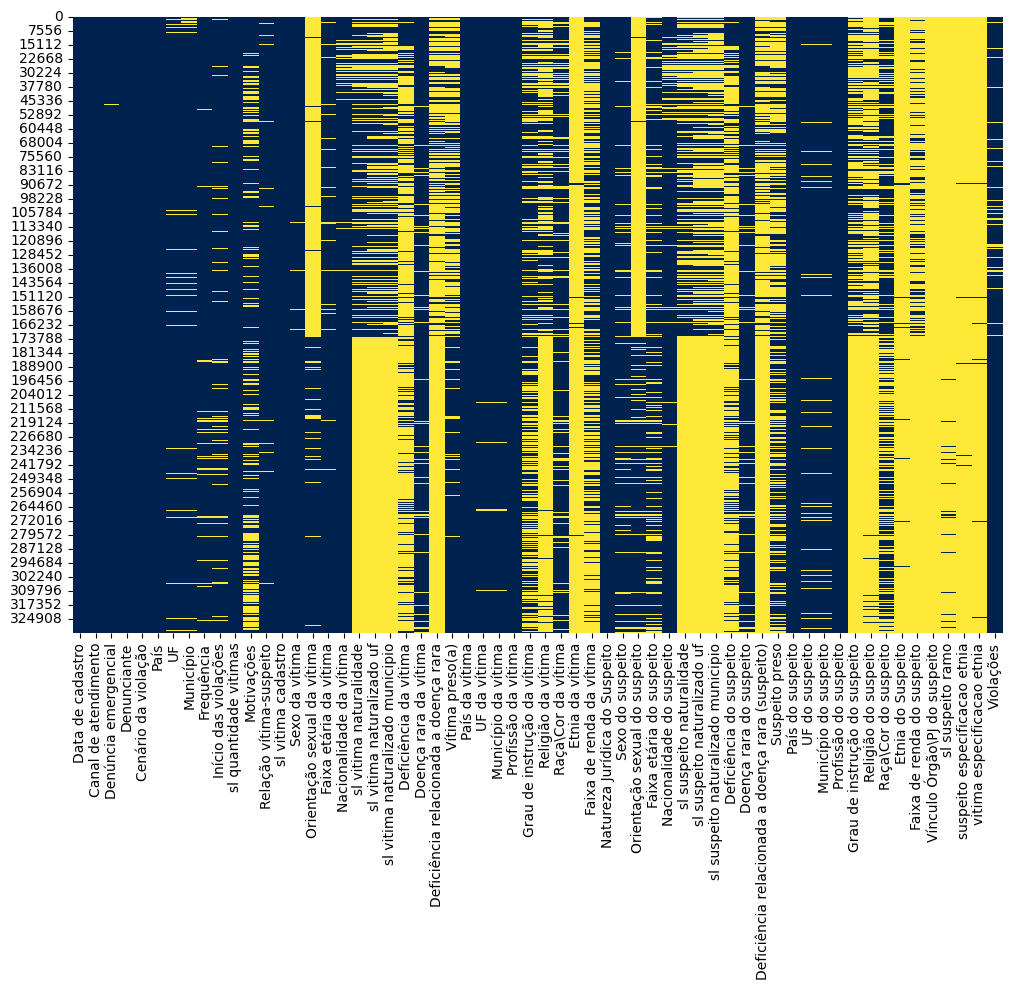

In [6]:
# Visualização dos valores nulos com um heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, cmap='cividis')
plt.show()

## Limpando dados

In [4]:
contagem = data["Orientação sexual da vítima"].value_counts()
contagem2 =data["Orientação sexual do suspeito"].value_counts()
print(contagem)
print(contagem2)

Orientação sexual da vítima
NAO                         147576
HOMOSSEXUAL                   1540
OUTRO                          769
BISSEXUAL                      538
PESSOA TRANS.TRANSEXUAL        210
PESSOA TRANS.TRANSGENERO       208
PANSEXUAL                       36
PESSOA TRANS.TRAVESTI           23
ASSEXUAL                        15
Name: count, dtype: int64
Orientação sexual do suspeito
NAO                         139898
HOMOSSEXUAL                   1018
OUTRO                          540
BISSEXUAL                      217
PESSOA TRANS.TRANSEXUAL         45
PANSEXUAL                       23
PESSOA TRANS.TRAVESTI           21
PESSOA TRANS.TRANSGENERO        19
ASSEXUAL                        12
Name: count, dtype: int64


In [5]:
orient_sex_V = 'Orientação sexual da vítima'
data[orient_sex_V]= data[orient_sex_V].replace("NAO", "Heterossexual")
data[orient_sex_V] = data[orient_sex_V].fillna("Nao Informado")

orient_sex_S = 'Orientação sexual do suspeito'
data[orient_sex_S]= data[orient_sex_S].replace("NAO", "Heterossexual")
data[orient_sex_S] = data[orient_sex_S].fillna("Nao Informado")

In [6]:
contagem = data["Orientação sexual da vítima"].value_counts()
contagem2 =data["Orientação sexual do suspeito"].value_counts()
print(contagem)
print(contagem2)

Orientação sexual da vítima
Nao Informado               181518
Heterossexual               147576
HOMOSSEXUAL                   1540
OUTRO                          769
BISSEXUAL                      538
PESSOA TRANS.TRANSEXUAL        210
PESSOA TRANS.TRANSGENERO       208
PANSEXUAL                       36
PESSOA TRANS.TRAVESTI           23
ASSEXUAL                        15
Name: count, dtype: int64
Orientação sexual do suspeito
Nao Informado               190640
Heterossexual               139898
HOMOSSEXUAL                   1018
OUTRO                          540
BISSEXUAL                      217
PESSOA TRANS.TRANSEXUAL         45
PANSEXUAL                       23
PESSOA TRANS.TRAVESTI           21
PESSOA TRANS.TRANSGENERO        19
ASSEXUAL                        12
Name: count, dtype: int64


In [7]:
contagem3 = data["sl suspeito naturalidade"].value_counts()
contagem4 =data["sl vitima naturalidade"].value_counts()
nulos_nat_S = data["sl suspeito naturalidade"].isnull().sum()
nulos_nat_V = data["sl vitima naturalidade"].isnull().sum()

print(contagem3)
print(f"\nnulos suspeito naturalidade: {nulos_nat_S}")

print(contagem4)
print(f"\nnulos vitima naturalidade: {nulos_nat_V}")

data["sl vitima naturalidade"] = data["sl vitima naturalidade"].fillna("Nao Informado")
data["sl suspeito naturalidade"] = data["sl suspeito naturalidade"].fillna("Nao Informado")

sl suspeito naturalidade
NATO            103299
NATURALIZADO      2149
Name: count, dtype: int64

nulos suspeito naturalidade: 226985
sl vitima naturalidade
NATO            121825
NATURALIZADO      2408
Name: count, dtype: int64

nulos vitima naturalidade: 208200


In [8]:
contagem5 = data["sl suspeito naturalizado uf"].value_counts()
contagem6 =data["sl vitima naturalizado uf"].value_counts()
nulos_nat_S = data["sl suspeito naturalizado uf"].isnull().sum()
nulos_nat_V = data["sl vitima naturalizado uf"].isnull().sum()

print(contagem5)
print(f"\nnulos suspeito naturalidade uf: {nulos_nat_S}")

print(contagem6)
print(f"\nnulos vitima naturalidade uf: {nulos_nat_V}")


sl suspeito naturalizado uf
RJ    15336
SP    14321
MG     8279
BA     6480
RS     4357
PE     3197
PR     2791
CE     2747
PA     2122
MA     1997
GO     1980
SC     1766
PB     1558
DF     1480
PI     1458
RN     1429
MS     1421
AL     1419
AM     1385
ES     1312
SE      837
MT      638
TO      498
RO      394
AP      226
AC      208
RR      117
Name: count, dtype: int64

nulos suspeito naturalidade uf: 252680
sl vitima naturalizado uf
RJ    20028
SP    19740
MG    11261
BA     8658
RS     5602
PE     4457
PR     4152
CE     3692
PA     3011
MA     2798
GO     2603
SC     2337
PB     2133
DF     2078
PI     1968
AM     1911
AL     1909
MS     1905
RN     1904
ES     1814
SE     1088
MT      982
TO      768
RO      556
AC      292
AP      267
RR      129
Name: count, dtype: int64

nulos vitima naturalidade uf: 224390


In [9]:
data["sl vitima naturalizado uf"] = data["sl vitima naturalizado uf"].fillna("Nao Informado")
data["sl suspeito naturalizado uf"] = data["sl vitima naturalizado uf"].fillna("Nao Informado")
nulos_nat_V = data["sl vitima naturalizado uf"].isnull().sum()
print(nulos_nat_V)
print(contagem6)

0
sl vitima naturalizado uf
RJ    20028
SP    19740
MG    11261
BA     8658
RS     5602
PE     4457
PR     4152
CE     3692
PA     3011
MA     2798
GO     2603
SC     2337
PB     2133
DF     2078
PI     1968
AM     1911
AL     1909
MS     1905
RN     1904
ES     1814
SE     1088
MT      982
TO      768
RO      556
AC      292
AP      267
RR      129
Name: count, dtype: int64


In [10]:
contagem7 = data["sl suspeito naturalizado municipio"].value_counts()
nulos_nat_S_mun = data["sl suspeito naturalizado municipio"].isnull().sum()

contagem8 =data["sl vitima naturalizado municipio"].value_counts()
nulos_nat_V_mun = data["sl vitima naturalizado municipio"].isnull().sum()

print(contagem7)
print(f"\nnulos suspeito naturalidade municipio: {nulos_nat_S_mun}")

print(contagem8)
print(f"\nnulos vitima naturalidade municipio: {nulos_nat_V_mun}")

sl suspeito naturalizado municipio
RIO DE JANEIRO               7449
SAO PAULO                    4856
SALVADOR                     1659
BELO HORIZONTE               1631
BRASILIA                     1416
                             ... 
GOVERNADOR EUGENIO BARROS       1
GRAO PARA                       1
FERNAO                          1
ALVARAES                        1
SAO FRANCISCO DO BREJAO         1
Name: count, Length: 4045, dtype: int64

nulos suspeito naturalidade municipio: 260465
sl vitima naturalizado municipio
RIO DE JANEIRO            9591
SAO PAULO                 7104
BELO HORIZONTE            2383
SALVADOR                  2182
BRASILIA                  1935
                          ... 
IPIGUA                       1
SAO JOSE DO MANTIMENTO       1
MARZAGAO                     1
FERNAO                       1
NOVO TIRADENTES              1
Name: count, Length: 4291, dtype: int64

nulos vitima naturalidade municipio: 230686


In [11]:
data["sl vitima naturalizado municipio"] = data["sl vitima naturalizado municipio"].fillna("Nao Informado")
data["sl suspeito naturalizado municipio"] = data["sl suspeito naturalizado municipio"].fillna("Nao Informado")

contagem7 = data["sl suspeito naturalizado municipio"].value_counts()
nulos_nat_S_mun = data["sl suspeito naturalizado municipio"].isnull().sum()

contagem8 =data["sl vitima naturalizado municipio"].value_counts()
nulos_nat_V_mun = data["sl vitima naturalizado municipio"].isnull().sum()

print(contagem7)
print(contagem8)

sl suspeito naturalizado municipio
Nao Informado     260465
RIO DE JANEIRO      7449
SAO PAULO           4856
SALVADOR            1659
BELO HORIZONTE      1631
                   ...  
GRACA ARANHA           1
SILVIANOPOLIS          1
MATINHAS               1
AREALVA                1
NOVO ORIENTE           1
Name: count, Length: 4046, dtype: int64
sl vitima naturalizado municipio
Nao Informado             230686
RIO DE JANEIRO              9591
SAO PAULO                   7104
BELO HORIZONTE              2383
SALVADOR                    2182
                           ...  
ENGENHO VELHO                  1
IPIGUA                         1
SAO JOSE DO MANTIMENTO         1
MARZAGAO                       1
NOVO TIRADENTES                1
Name: count, Length: 4292, dtype: int64


In [12]:
contagem9 = data["Deficiência do suspeito"].value_counts()
nulos_def_S = data["Deficiência do suspeito"].isnull().sum()

contagem10 =data["Deficiência da vítima"].value_counts()
nulos_def_V = data["Deficiência da vítima"].isnull().sum()

print(contagem9)
print(f"\nnulos Deficiência do suspeito: {nulos_def_S}")

print(contagem10)
print(f"\nnulos Deficiência da vítima: {nulos_def_V}")

Deficiência do suspeito
NAO TEM DEFICIENCIA                  87824
FISICA/MOTORA                          841
MENTAL/INTELECTUAL                     675
VISUAL                                 280
TEM DEFICIENCIA MAS NAO SABE QUAL      144
AUDITIVA/SURDEZ                        108
AUTISMO                                  8
MULTIPLA                                 3
Name: count, dtype: int64

nulos Deficiência do suspeito: 242550
Deficiência da vítima
NAO TEM DEFICIENCIA                  84536
MENTAL/INTELECTUAL                    2953
FISICA/MOTORA                         2192
VISUAL                                 763
AUDITIVA/SURDEZ                        381
TEM DEFICIENCIA MAS NAO SABE QUAL      364
AUTISMO                                 89
MULTIPLA                                39
Name: count, dtype: int64

nulos Deficiência da vítima: 241116


In [13]:
data["Deficiência do suspeito"] = data["Deficiência do suspeito"].fillna("Nao Informado")
contagem9 = data["Deficiência do suspeito"].value_counts()
nulos_def_S = data["Deficiência do suspeito"].isnull().sum()

data["Deficiência da vítima"] = data["Deficiência da vítima"].fillna("Nao Informado")
contagem10 =data["Deficiência da vítima"].value_counts()
nulos_def_V = data["Deficiência da vítima"].isnull().sum()

print(contagem9)
print("\n")
print(contagem10)

Deficiência do suspeito
Nao Informado                        242550
NAO TEM DEFICIENCIA                   87824
FISICA/MOTORA                           841
MENTAL/INTELECTUAL                      675
VISUAL                                  280
TEM DEFICIENCIA MAS NAO SABE QUAL       144
AUDITIVA/SURDEZ                         108
AUTISMO                                   8
MULTIPLA                                  3
Name: count, dtype: int64


Deficiência da vítima
Nao Informado                        241116
NAO TEM DEFICIENCIA                   84536
MENTAL/INTELECTUAL                     2953
FISICA/MOTORA                          2192
VISUAL                                  763
AUDITIVA/SURDEZ                         381
TEM DEFICIENCIA MAS NAO SABE QUAL       364
AUTISMO                                  89
MULTIPLA                                 39
Name: count, dtype: int64


In [14]:
contagem11 = data["Doença rara do suspeito"].value_counts()
nulos_doe_S = data["Doença rara do suspeito"].isnull().sum()

contagem12 =data["Doença rara da vítima"].value_counts()
nulos_doe_V = data["Doença rara da vítima"].isnull().sum()

print(contagem11)
print(f"\nnulos Doença rara do suspeito: {nulos_doe_S}")

print(contagem12)
print(f"\nnulos Doença rara da vítima: {nulos_doe_V}")

Doença rara do suspeito
NAO TEM DOENCA RARA                                            312270
TEM DOENCA RARA MAS NAO SABE QUAL                                 145
POSSUI OUTRA DOENCA RARA NAO LISTADA                              131
POSSUI DOENCA RARA, MAS NAO SABE QUAL                             130
POSSUI OUTRA DOENCA RARA NAO LISTADA ABAIXO                       121
DIABETE INSIPIDO                                                   79
SINDROME DE BUDD-CHIARI                                            44
ESCLEROSE MULTIPLA                                                 10
IMUNODEFICIENCIAS PRIMARIAS COM DEFICIENCIA DE ANTICORPOS          10
DEFICIENCIA INTELECTUAL                                             9
LUPUS ERITEMATOSO SISTEMICO                                         8
ACALVARIA                                                           7
ANEMIA FALCIFORME                                                   7
ARTRITE REUMATOIDE                                                

In [15]:
data["Doença rara do suspeito"] = data["Doença rara do suspeito"].fillna("Nao Informado")
contagem11 = data["Doença rara do suspeito"].value_counts()
nulos_def_S = data["Doença rara do suspeito"].isnull().sum()

data["Doença rara da vítima"] = data["Doença rara da vítima"].fillna("Nao Informado")
contagem12 = data["Doença rara da vítima"].value_counts()
nulos_def_V = data["Doença rara da vítima"].isnull().sum()

print(contagem11)
print("\n")
print(contagem12)


Doença rara do suspeito
NAO TEM DOENCA RARA                                            312270
Nao Informado                                                   19400
TEM DOENCA RARA MAS NAO SABE QUAL                                 145
POSSUI OUTRA DOENCA RARA NAO LISTADA                              131
POSSUI DOENCA RARA, MAS NAO SABE QUAL                             130
POSSUI OUTRA DOENCA RARA NAO LISTADA ABAIXO                       121
DIABETE INSIPIDO                                                   79
SINDROME DE BUDD-CHIARI                                            44
ESCLEROSE MULTIPLA                                                 10
IMUNODEFICIENCIAS PRIMARIAS COM DEFICIENCIA DE ANTICORPOS          10
DEFICIENCIA INTELECTUAL                                             9
LUPUS ERITEMATOSO SISTEMICO                                         8
ACALVARIA                                                           7
ANEMIA FALCIFORME                                                 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 60 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Data de cadastro                                  332433 non-null  object 
 1   Canal de atendimento                              332406 non-null  object 
 2   Denúncia emergencial                              331996 non-null  object 
 3   Denunciante                                       332388 non-null  object 
 4   Cenário da violação                               331096 non-null  object 
 5   País                                              332369 non-null  object 
 6   UF                                                320538 non-null  object 
 7   Município                                         317770 non-null  object 
 8   Frequência                                        316039 non-null  object 
 9   Iníc

In [17]:
#contagem13 = data["Religião do suspeito"].value_counts()
#nulos_reg_S = data["Religião do suspeito"].isnull().sum()

contagem14 =data["Religião da vítima"].value_counts()
nulos_reg_V = data["Religião da vítima"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem14)
print(f"\nReligião da vítima: {nulos_reg_V}")

Religião da vítima
CATOLICA APOSTOLICA ROMANA                             37828
SEM RELIGIAO                                           10977
ASSEMBLEIA DE DEUS                                     10209
EVANGELHO QUADRANGULAR                                  6323
OUTRAS RELIGIOES                                        4937
OUTROS PENTECOSTAIS/NEOPENTECOSTAIS                     4358
ESPIRITISMO                                             2960
CONGREGACAO CRISTA NO BRASIL                            2532
BATISTA                                                 2284
UNIVERSAL DO REINO DE DEUS                              2115
NAO SABE                                                2058
EVANGELICA                                              1633
UMBANDA                                                 1261
ADVENTISTA DO SETIMO DIA                                1023
TESTEMUNHAS DE JEOVA                                     852
CANDOMBLE                                                753
IGREJ

In [18]:
data["Religião da vítima"] = data["Religião da vítima"].fillna("Nao Informado")
contagem14 = data["Religião da vítima"].value_counts()
nulos_def_V = data["Religião da vítima"].isnull().sum()

print(contagem14)
print(f"numero de nulos: {nulos_def_V}")


Religião da vítima
Nao Informado                                          237035
CATOLICA APOSTOLICA ROMANA                              37828
SEM RELIGIAO                                            10977
ASSEMBLEIA DE DEUS                                      10209
EVANGELHO QUADRANGULAR                                   6323
OUTRAS RELIGIOES                                         4937
OUTROS PENTECOSTAIS/NEOPENTECOSTAIS                      4358
ESPIRITISMO                                              2960
CONGREGACAO CRISTA NO BRASIL                             2532
BATISTA                                                  2284
UNIVERSAL DO REINO DE DEUS                               2115
NAO SABE                                                 2058
EVANGELICA                                               1633
UMBANDA                                                  1261
ADVENTISTA DO SETIMO DIA                                 1023
TESTEMUNHAS DE JEOVA                               

In [19]:
contagem15 =data["Faixa de renda da vítima"].value_counts()
nulos_faixa_V = data["Faixa de renda da vítima"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem15)
print(f"\nFaixa de renda da vítima: {nulos_faixa_V}")

data["Faixa de renda da vítima"] = data["Faixa de renda da vítima"].fillna("Nao Informado")



Faixa de renda da vítima
ATE 1 SM          55325
1 A 3 SM          38210
3 A 5 SM          11175
ATE 1/2 SM         9984
SEM RENDIMENTO     7048
5 A 15 SM          3695
ACIMA DE 15 SM      432
10 A 20 SM          392
MAIS DE 20 SM       167
Name: count, dtype: int64

Faixa de renda da vítima: 206005


In [20]:
contagem16 =data["Motivações"].value_counts()
nulos_mot = data["Motivações"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem16)
print(f"\nnulos de motivações: {nulos_mot}")

data["Motivações"] = data["Motivações"].fillna("Nao Informado")



Motivações
EM RAZAO DO SEXO BIOLOGICO                                                                                                                                                                                                                        36043
DA COABITACAO/ CONVIVENCIA FAMILIAR/ RELACAO AFETIVA                                                                                                                                                                                              20473
AGRAVANTE.POR CONDUTAS EXCESSIVAS/DESNECESSARIAS/DESACONSELHADAS                                                                                                                                                                                  18137
AGRAVANTE.DA COABITACAO/CONVIVENCIA FAMILIAR/RELACAO AFETIVA                                                                                                                                                                                      166

In [21]:
contagem17 =data["Vítima preso(a)"].value_counts()
nulos_preso_V = data["Vítima preso(a)"].isnull().sum()


#print(contagem11)
#print(f"\nReligião do suspeito: {nulos_reg_S}")

print(contagem17)
print(f"\nnulos de vítimas presas: {nulos_preso_V}")

data["Vítima preso(a)"] = data["Vítima preso(a)"].fillna("Nao Informado")

Vítima preso(a)
NAO                   220461
TEMPORARIA               438
FLAGRANTE                282
PENA (RECLUSAO)          242
PENA                     157
PREVENTIVA                86
PENA (SEMI-ABERTO)        42
Name: count, dtype: int64

nulos de vítimas presas: 110725


In [22]:
contagem18 =data["Suspeito preso"].value_counts()
nulos_preso_S = data["Suspeito preso"].isnull().sum()

print(contagem18)
print(f"\nnulos de suspeitos presos: {nulos_preso_S}")
data["Suspeito preso"] = data["Suspeito preso"].fillna("Nao Informado")

Suspeito preso
NAO                      149283
FLAGRANTE                  6802
TEMPORARIA                 4231
PENA (RECLUSAO)            3892
PENA                       3008
PREVENTIVA                 1562
PENA (SEMI-ABERTO)         1173
MEDIDA SOCIOEDUCATIVA        63
Name: count, dtype: int64

nulos de suspeitos presos: 162419


In [23]:
#Grau de instrução da vítima
#Raça\Cor do suspeito

contagem19 =data["Grau de instrução da vítima"].value_counts()
nulos_grau_V = data["Grau de instrução da vítima"].isnull().sum()

print(contagem19)
print(f"\nnulos de Grau de instrução da vítima: {nulos_grau_V}")
data["Grau de instrução da vítima"] = data["Grau de instrução da vítima"].fillna("Nao Informado")

Grau de instrução da vítima
ENSINO MEDIO COMPLETO            67591
ENSINO FUNDAMENTAL INCOMPLETO    43442
SUPERIOR COMPLETO                23112
ENSINO MEDIO INCOMPLETO          19925
SUPERIOR INCOMPLETO              17929
ENSINO FUNDAMENTAL COMPLETO      12309
POS-GRADUACAO                     4862
ANALFABETO                        4151
MESTRADO                           644
DOUTORADO                          298
POS-DOUTORADO                       82
Name: count, dtype: int64

nulos de Grau de instrução da vítima: 138088


In [24]:
contagem20 =data["Raça\Cor do suspeito"].value_counts()
nulos_raca_S = data["Raça\Cor do suspeito"].isnull().sum()

print(contagem20)
print(f"\nnulos de Raça\Cor do suspeito: {nulos_raca_S}")
data["Raça\Cor do suspeito"] = data["Raça\Cor do suspeito"].fillna("Nao Informado")

Raça\Cor do suspeito
BRANCA      91983
PARDA       88891
PRETA       35905
AMARELA      1179
INDIGENA      697
Name: count, dtype: int64

nulos de Raça\Cor do suspeito: 113778


In [25]:
data.isnull().sum()

Data de cadastro                                         0
Canal de atendimento                                    27
Denúncia emergencial                                   437
Denunciante                                             45
Cenário da violação                                   1337
País                                                    64
UF                                                   11895
Município                                            14663
Frequência                                           16394
Início das violações                                 30487
sl quantidade vitimas                                    1
Motivações                                               0
Relação vítima-suspeito                               4139
sl vitima cadastro                                      75
Sexo da vítima                                        2036
Orientação sexual da vítima                              0
Faixa etária da vítima                               106

In [28]:
# Lista de colunas a serem removidas
colunas_para_remover = [
    "Deficiência relacionada a doença rara",
    "Deficiência relacionada a doença rara (suspeito)",
    "Etnia da vítima",
    "Etnia do Suspeito",
    "Faixa de renda do suspeito",
    "Vínculo Órgão\\PJ do suspeito",
    "sl suspeito ramo",
    "suspeito especificacao etnia",
    "vitima especificacao etnia",
    "Religião do suspeito",
    "Grau de instrução do suspeito"
]

#Vítima preso(a)
# Removendo as colunas do DataFrame
data = data.drop(columns=colunas_para_remover)

# Exibindo as primeiras linhas do DataFrame para verificar as mudanças
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332433 entries, 0 to 332432
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Data de cadastro                    332433 non-null  object 
 1   Canal de atendimento                332406 non-null  object 
 2   Denúncia emergencial                331996 non-null  object 
 3   Denunciante                         332388 non-null  object 
 4   Cenário da violação                 331096 non-null  object 
 5   País                                332369 non-null  object 
 6   UF                                  320538 non-null  object 
 7   Município                           317770 non-null  object 
 8   Frequência                          316039 non-null  object 
 9   Início das violações                301946 non-null  object 
 10  sl quantidade vitimas               332432 non-null  float64
 11  Motivações                

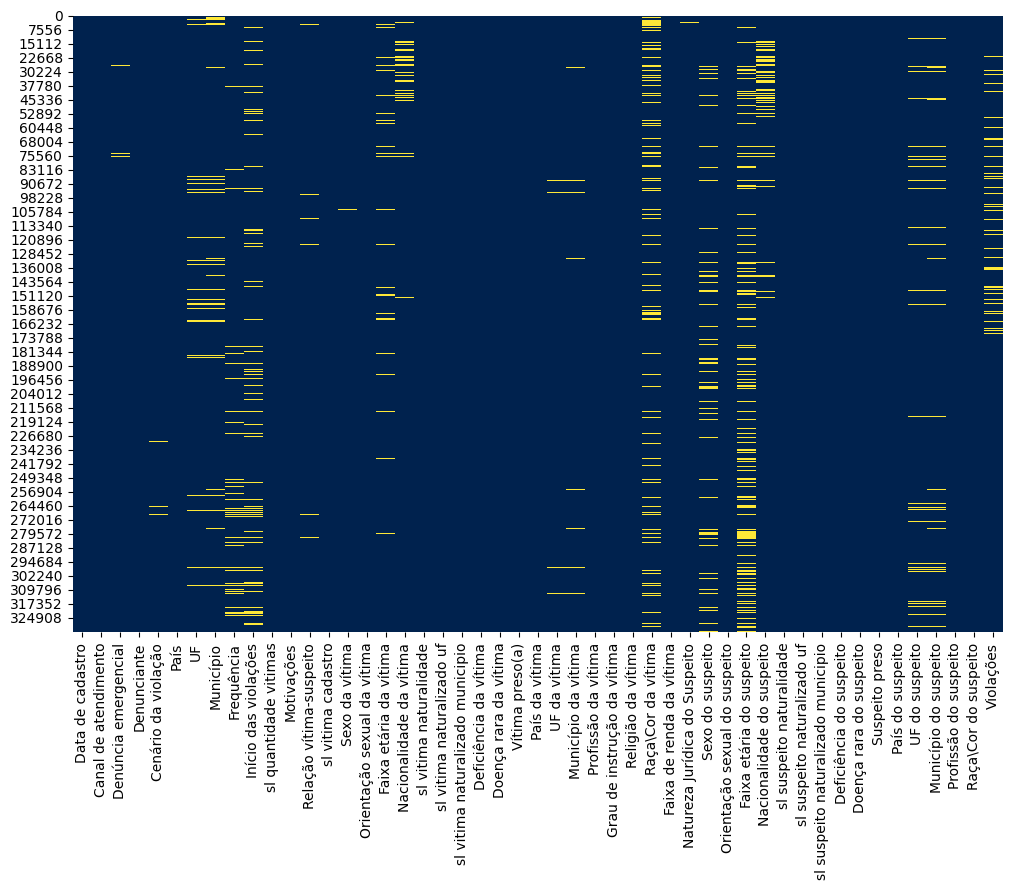

In [29]:
# Visualização dos valores nulos com um heatmap
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, cmap='cividis')
plt.show()

In [30]:
def count_null_rows_to_remove(df):
    # Conta o número de linhas antes da remoção
    initial_row_count = data.shape[0]
    
    # Conta o número de linhas que seriam mantidas após a remoção das linhas com valores nulos
    rows_remaining = data.dropna().shape[0]
    
    # Calcula o número de linhas que seriam removidas
    rows_to_remove = initial_row_count - rows_remaining
    
    return rows_to_remove

# Supondo que 'df' seja o seu dataset
rows_to_remove = count_null_rows_to_remove(data)
print(f"Número de linhas que seriam removidas: {rows_to_remove}")

Número de linhas que seriam removidas: 141635


In [31]:
data_cleaned = data.dropna()
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190798 entries, 1 to 332432
Data columns (total 49 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Data de cadastro                    190798 non-null  object 
 1   Canal de atendimento                190798 non-null  object 
 2   Denúncia emergencial                190798 non-null  object 
 3   Denunciante                         190798 non-null  object 
 4   Cenário da violação                 190798 non-null  object 
 5   País                                190798 non-null  object 
 6   UF                                  190798 non-null  object 
 7   Município                           190798 non-null  object 
 8   Frequência                          190798 non-null  object 
 9   Início das violações                190798 non-null  object 
 10  sl quantidade vitimas               190798 non-null  float64
 11  Motivações                     

In [ ]:
data_cleaned.to_excel("data20-2_ate_23-2_sem_nulos_190.xlsx", index=False)


In [9]:
# def FiltraTabela(df, nullValuesPercentAcceptable, uniqueValuesCountAcceptable): 
#     # Define um novo dataset com as colunas que possuem um número de valores nulos e occorrências únicas aceitáveis para a codificação,
#     # diminuido assim a dimensionalidade
#     selectedColumns = []

#     # Padronização de valores ausentes. Define os valores em ausentes como "NULO"
#     df = df.applymap(lambda x: "NULO" if pd.isnull(x) else x)

#     # Para cada coluna do dataset
#     for column in df:
#         # Cálculo da porcentagem de valores nulos
#         nullValuesPercent = (df[column].value_counts().get('NULO', 0) * 100) / len(df)

#         # Cálculo do número de ocorrências únicas
#         uniqueValuesCount = df[column].nunique()

#         # Prints para verificação
#         print(f'Coluna: {column}')
#         print(f'Porcentagem de Valores Nulos: {nullValuesPercent:.2f}%')
#         print(f'Número de Valores Únicos: {uniqueValuesCount}')

#         # Condição para compôr o novo dataset
#         if nullValuesPercent < nullValuesPercentAcceptable and uniqueValuesCount < uniqueValuesCountAcceptable:
#             selectedColumns.append(column)
#             print("Inserido\n")
#         else:
#             print("Não Inserido\n")

#     # Cria uma cópia com as colunas definidas anteriormente.
#     dfFiltered = df[selectedColumns].copy()

#     # Define todas as colunas do dataset como string
#     dfFiltered = dfFiltered.astype(str)

#     return dfFiltered



# Escolha do Número de Clusters e Algoritmos de Inicialização 

A determinação do número adequado de clusters é fundamental para a preparação de modelos, principalmente para aqueles que utilizam métodos de clusterização que exigem a definição de uma quantidade préviamente, como o K-Modes e K-Means. 

O número de clusters pode, em alguns casos, ser facilmente determinado a partir do contexto de onde foram tirados os dados. Para dados de vendas de uma loja, por exemplo, o número de clusters pode ser referente ao número de produtos que a loja vende, de maneira que cada cluster representa o perfil do cliente que o consome. 

Se não, métodos como o Elbow Method, o Silhouette Score ou o Davies-Bouldin Index podem ajudar a estimar um número ótimo de clusters baseando-se na coesão interna dos clusters e na separação entre eles.

Aqui será usado o Elbow Method para encontrar um K (número de clusters) ótimo para nosso data set, com diferentes algoritmos de escolha para os valores iniciais de referência (modes) de cada cluster.

Todas as execuções serão feitas 5 vezes (n_init = 5) para garantir que não hajam tendências na geração de números aleatórios.

# Clusterização com K-Modes

1) https://pypi.org/project/kmodes/ 

2) https://harikabonthu96.medium.com/kmodes-clustering-2286a9bfdcfb

3) https://awari.com.br/aprenda-a-utilizar-o-k-modes-com-python-para-analise-de-dados/?utm_source=blog&utm_campaign=projeto+blog&utm_medium=Aprenda%20a%20Utilizar%20o%20K-Modes%20com%20Python%20para%20Análise%20de%20Dados

4) https://link.springer.com/article/10.1007/s00357-001-0004-3

In [ ]:
dataFiltered = FiltraTabela(data, 50, 100)

# Definição de com quantos clusters será testado.
numbersOfClustersKModes = range(1,5)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Modes
costRandom = []
costCao = []
costHuang = []

In [ ]:
# Escolha aleatória dos modes (init = "random").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "random", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costRandom.append(kmode.cost_)

In [ ]:
# Modes escolhidos com base no algoritmo de Cao (init = "cao").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "cao", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costCao.append(kmode.cost_)

In [ ]:
# Modes escolhidos com base no algoritmo de Huang (init = "huang").
for clustersNumber in list(numbersOfClustersKModes):
    kmode = KModes(n_clusters=clustersNumber, init = "huang", n_init = 5, verbose=1, n_jobs = -1)
    kmode.fit_predict(dataFiltered)
    costHuang.append(kmode.cost_)

In [ ]:
costsKModes = pd.DataFrame({
    "Random" : costRandom,
    "Cao" : costCao,
    "Huang" : costHuang,
    "Número de Clusters" : numbersOfClustersKModes
})

# Visualização dos custos
fig = px.line(
    costsKModes, 
    x = "Número de Clusters", 
    y = ["Random", "Cao", "Huang"], 
    title = (
        f"Método do Cotovelo para o KModes com até {len(numbersOfClustersKModes)} clusters<br>"
        f"(dataset: {nomeDoArquivo}, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptable}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptable})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Custo",
    legend_title="Método de Inicialização"
)

fig.show()

# Clusterização com K-Means

## Teste 1 

Teste para verificar se o tipo de condificação (Binária e One-Hot) influencia no resultado da clusterização.

**Conclusão**: Não influencia.



### Teste 1.1: 

**Codificação**: binária

**Porcentagem de valores únicos aceito**: -
         
**Número de occorrências únicas aceita**: - 

In [ ]:
# Cria o dataset com a Codificação Binária
codificador = ce.BinaryEncoder(cols=data.columns)
dataBinaryTest1_1 = codificador.fit_transform(data)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest1_1 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest1_1 = []
inertiaKMeansTest1_1 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest1_1:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataBinaryTest1_1)
    inertiaRandomTest1_1.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest1_1:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataBinaryTest1_1)
    inertiaKMeansTest1_1.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_1 = pd.DataFrame({
    "Random" : inertiaRandomTest1_1,
    "K-Means++" : inertiaKMeansTest1_1,
    "Número de Clusters" : numbersOfClustersKMeansTest1_1
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest1_1, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.1: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_1)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, "
        f"porcentagem de valores nulos aceito: 100%, "
        f"quantia de valores únicos por coluna aceito: tudo)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

### Teste 1.2: 

**Codificação**: binária

**Porcentagem de valores únicos aceito**: 50%
         
**Número de occorrências únicas aceita**: 500 

In [ ]:
# Cria o dataset filtrado e aplica a Codificação Binária
nullValuesPercentAcceptableTest1_2 = 50
uniqueValuesCountAcceptableTest1_2 = 500
dataFilteredTest1_2 = FiltraTabela(data, nullValuesPercentAcceptableTest1_2, uniqueValuesCountAcceptableTest1_2)
codificador = ce.BinaryEncoder(cols=dataFilteredTest1_2.columns)
dataFilteredBinaryTest1_2 = codificador.fit_transform(dataFilteredTest1_2)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest1_2 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest1_2 = []
inertiaKMeansTest1_2 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest1_2:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataFilteredBinaryTest1_2)
    inertiaRandomTest1_2.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest1_2:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataFilteredBinaryTest1_2)
    inertiaKMeansTest1_2.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_2 = pd.DataFrame({
    "Random" : inertiaRandomTest1_2,
    "K-Means++" : inertiaKMeansTest1_2,
    "Número de Clusters" : numbersOfClustersKMeansTest1_2
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest1_2, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.2: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_2)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptableTest1_2}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptableTest1_2})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

### Teste 1.3: 

**Codificação**: One-Hot

**Porcentagem de valores únicos aceito**: 50%
         
**Número de occorrências únicas aceita**: 500 

In [ ]:
# Cria o dataset filtrado e aplica Codificação One-Hot
nullValuesPercentAcceptableTest1_3 = 50
uniqueValuesCountAcceptableTest1_3 = 500
dataFilteredTest1_3 = FiltraTabela(data, nullValuesPercentAcceptableTest1_3, uniqueValuesCountAcceptableTest1_3)
dataFilteredOneHotTest1_3 = pd.get_dummies(dataFilteredTest1_3)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest1_3 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest1_3 = []
inertiaKMeansTest1_3 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest1_3:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataFilteredOneHotTest1_3)
    inertiaRandomTest1_3.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest1_3:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataFilteredOneHotTest1_3)
    inertiaKMeansTest1_3.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest1_3 = pd.DataFrame({
    "Random" : inertiaRandomTest1_3,
    "K-Means++" : inertiaKMeansTest1_3,
    "Número de Clusters" : numbersOfClustersKMeansTest1_3
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest1_3, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 1.3: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest1_3)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: One-Hot, "
        f"porcentagem de valores nulos aceito: {nullValuesPercentAcceptableTest1_3}%, "
        f"quantia de valores únicos por coluna aceito: {uniqueValuesCountAcceptableTest1_3})"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

## Teste 2

Teste de clusterização sobre colunas especificas de perfil de vítima e suspeito, para as duas codificações. Colunas usadas:

 'Sexo da vítima',
 'Sexo do suspeito', 
 'Raça\Cor da vítima', 
 'Raça\Cor do suspeito',
 'Faixa etária da vítima', 
 'Faixa etária do suspeito',
 'Grau de instrução da vítima', 
 'Grau de instrução do suspeito'

### Teste 2.1

**Codificação**: Binária

In [ ]:
# Seleciona as colunas que serão utilizadas
dataSelectedTest2_1 = data[['Sexo da vítima',
                            'Sexo do suspeito',
                            'Raça\\Cor da vítima',
                            'Raça\\Cor do suspeito',
                            'Faixa etária da vítima',
                            'Faixa etária do suspeito',
                            'Grau de instrução da vítima',
                            'Grau de instrução do suspeito']].copy()

# Aplica a codificação Binária
codificador = ce.BinaryEncoder(cols=dataSelectedTest2_1.columns)
dataSelectedBinaryTest2_1 = codificador.fit_transform(dataSelectedTest2_1) 

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest2_1 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest2_1 = []
inertiaKMeansTest2_1 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest2_1:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataSelectedBinaryTest2_1)
    inertiaRandomTest2_1.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest2_1:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataSelectedBinaryTest2_1)
    inertiaKMeansTest2_1.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest2_1 = pd.DataFrame({
    "Random" : inertiaRandomTest2_1,
    "K-Means++" : inertiaKMeansTest2_1,
    "Número de Clusters" : numbersOfClustersKMeansTest2_1
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest2_1, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 2.1: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest2_1)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: binária, colunas: Sexo, Raça\\Cor, Faixa Etária e Grau de Instrução)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()

## Teste 2.2

**Codificação**: One-Hot

In [ ]:
# Seleciona as colunas que serão utilizadas
dataSelectedTest2_2 = data[['Sexo da vítima',
                     'Sexo do suspeito',
                     'Raça\\Cor da vítima',
                     'Raça\\Cor do suspeito',
                     'Faixa etária da vítima',
                     'Faixa etária do suspeito',
                     'Grau de instrução da vítima',
                     'Grau de instrução do suspeito']].copy()

# Aplica a codificação One-Hot
dataSelectedOneHotTest2_2 = pd.get_dummies(dataSelectedTest2_2)

# Definição de com quantos clusters será testado.
numbersOfClustersKMeansTest2_2 = range(1, 15)

# Vetores para armazenar os "custos" (medida quantitativa de quão bem os clusters foram formados em termos de homogeneidade interna) para o K-Means
inertiaRandomTest2_2 = []
inertiaKMeansTest2_2 = []

In [ ]:
# Calculando a inertia para a inicialização 'random'
for clustersNumber in numbersOfClustersKMeansTest2_2:
    kmeans_random = KMeans(n_clusters=clustersNumber, init='random', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_random.fit(dataSelectedOneHotTest2_2)
    inertiaRandomTest2_2.append(kmeans_random.inertia_)

In [ ]:
# Calculando a inertia para a inicialização 'k-means++'
for clustersNumber in numbersOfClustersKMeansTest2_2:
    kmeans_kmeans = KMeans(n_clusters=clustersNumber, init='k-means++', random_state=42, n_init = 1, max_iter=300, algorithm = 'lloyd', verbose=0)
    kmeans_kmeans.fit(dataSelectedOneHotTest2_2)
    inertiaKMeansTest2_2.append(kmeans_kmeans.inertia_)

In [ ]:
inertiasKMeansTest2_2 = pd.DataFrame({
    "Random" : inertiaRandomTest2_2,
    "K-Means++" : inertiaKMeansTest2_2,
    "Número de Clusters" : numbersOfClustersKMeansTest2_2
})

# Visualização dos custos
fig = px.line(
    inertiasKMeansTest2_2, 
    x = "Número de Clusters", 
    y = ["Random", "K-Means++"], 
    title = (
        f"Teste 2.2: Método do Cotovelo para o KMeans com até {len(numbersOfClustersKMeansTest2_2)} clusters<br> "
        f"(dataset: {nomeDoArquivo}, codificação: One-Hot, colunas: Sexo, Raça\\Cor, Faixa Etária e Grau de Instrução)"
    )
)

fig.update_layout(
    xaxis_title="Número de Clusters",
    yaxis_title="Inércia",
    legend_title="Método de Inicialização"
)

fig.show()